# Importing Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

# Load dataset and save as 'wine' variable

In [29]:
wine = pd.read_json('./wine-reviews/winemag-data-130k-v2.json', dtype='unicode');


In [30]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,nan,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,None,None,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",None,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,None,Alexander Peartree,None,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [31]:
wine.index

RangeIndex(start=0, stop=129971, step=1)

In [32]:
wine.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [33]:
wine.shape

(129971, 13)

In [34]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129971 non-null object
description              129971 non-null object
designation              129971 non-null object
points                   129971 non-null object
price                    129971 non-null object
province                 129971 non-null object
region_1                 129971 non-null object
region_2                 129971 non-null object
taster_name              129971 non-null object
taster_twitter_handle    129971 non-null object
title                    129971 non-null object
variety                  129971 non-null object
winery                   129971 non-null object
dtypes: object(13)
memory usage: 12.9+ MB


In [35]:
wine.isnull().sum()

country                  0
description              0
designation              0
points                   0
price                    0
province                 0
region_1                 0
region_2                 0
taster_name              0
taster_twitter_handle    0
title                    0
variety                  0
winery                   0
dtype: int64

In [48]:
wine['points'] = wine.points.astype(int)
wine['price'] = wine.price.astype(float)

In [49]:
wine.dtypes

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [53]:
wine.isnull().sum()

country                     0
description                 0
designation                 0
points                      0
price                    8996
province                    0
region_1                    0
region_2                    0
taster_name                 0
taster_twitter_handle       0
title                       0
variety                     0
winery                      0
dtype: int64

In [54]:
wine.describe() 

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [55]:
wine.describe(include=['object'])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,129971,129971,129971,129971,129971,129971,129971,129971,129971,129971,129971
unique,44,119955,37980,426,1230,18,20,16,118840,708,16757
top,US,"Stalky aromas suggest hay and green herbs, wit...",None,California,None,None,None,None,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,37465,36247,21247,79460,26244,31213,11,13272,222


In [56]:
wine.price.mean()

35.363389129985535

In [57]:
wine.points.mean()

88.44713820775404

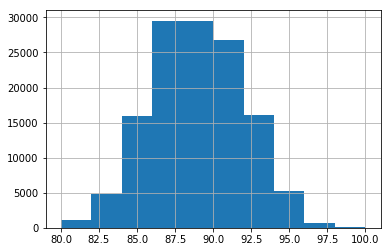

In [63]:
wine.points.hist(bins=10);

In [72]:
wine.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [73]:
wine.region_1.value_counts()

None                                                 21247
Napa Valley                                           4480
Columbia Valley (WA)                                  4124
Russian River Valley                                  3091
California                                            2629
Paso Robles                                           2350
Mendoza                                               2301
Willamette Valley                                     2301
Alsace                                                2163
Champagne                                             1613
Barolo                                                1599
Finger Lakes                                          1565
Sonoma Coast                                          1474
Brunello di Montalcino                                1470
Rioja                                                 1469
Sonoma County                                         1246
Toscana                                               11

In [74]:
wine.region_2.value_counts()

None                 79460
Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [77]:
wine.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
None                         63
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine 

In [78]:
wine.province.value_counts()

California                   36247
Washington                    8639
Bordeaux                      5941
Tuscany                       5897
Oregon                        5373
Burgundy                      3980
Northern Spain                3851
Piedmont                      3729
Mendoza Province              3264
Veneto                        2716
New York                      2688
Alsace                        2440
Northeastern Italy            2138
Loire Valley                  1856
Sicily & Sardinia             1797
Champagne                     1613
Southwest France              1503
Southern Italy                1349
South Australia               1349
Provence                      1346
Douro                         1281
Central Italy                 1233
Catalonia                     1164
Rhône Valley                  1081
Beaujolais                    1044
Mosel                         1039
Alentejano                     937
Colchagua Valley               830
Marlborough         

In [79]:
wine.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [85]:
wine.sort_values(['points', 'price'])  

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
23437,Argentina,Candied plum and red berry aromas smell like r...,Estate Bottled,80,5.0,Mendoza Province,Mendoza,None,Michael Schachner,@wineschach,Terrenal 2013 Estate Bottled Malbec (Mendoza),Malbec,Terrenal
125826,Argentina,"While this smells floral and candied, the pala...",None,80,5.0,Mendoza Province,Mendoza,None,Michael Schachner,@wineschach,Toca Diamonte 2010 Malbec (Mendoza),Malbec,Toca Diamonte
34501,Chile,"Neutral aromas, sour apple and citrus flavors,...",None,80,6.0,Curicó Valley,None,None,Michael Schachner,@wineschach,Quasar 2009 Chardonnay (Curicó Valley),Chardonnay,Quasar
81390,Spain,"Very light, even thin, this white lacks the st...",Mediterranean White,80,6.0,Catalonia,Catalonia,None,None,None,René Barbier NV Mediterranean White White (Cat...,White Blend,René Barbier
99996,Chile,"The nose is sulphuric and a bit barnyardy, whi...",Estate,80,6.0,Maipo Valley,None,None,Michael Schachner,@wineschach,Santa Alicia 2001 Estate Chardonnay (Maipo Val...,Chardonnay,Santa Alicia
13782,Chile,"Yeasty, melony and smelling like yellow mustar...",Left Coast,80,7.0,Chile,None,None,Michael Schachner,@wineschach,flipflop NV Left Coast Moscato (Chile),Moscato,flipflop
34500,Chile,Average peach and apple aromas are as good as ...,Un-Oaked,80,7.0,Colchagua Valley,None,None,Michael Schachner,@wineschach,La Playa 2009 Un-Oaked Chardonnay (Colchagua V...,Chardonnay,La Playa
36194,Chile,"Tropical, citrusy aromas are about as good as ...",None,80,7.0,Central Valley,None,None,Michael Schachner,@wineschach,Beach Kite 2012 Moscato (Central Valley),Moscato,Beach Kite
54292,Spain,Dusty apple and papaya aromas lack fortitude. ...,None,80,7.0,Central Spain,La Mancha,None,Michael Schachner,@wineschach,Despierta 2014 Chardonnay (La Mancha),Chardonnay,Despierta
75555,Spain,"This affordable sparkler starts off with odd, ...",Carta Nevada Brut,80,7.0,Catalonia,Penedès,None,None,None,Freixenet NV Carta Nevada Brut (Penedès),Champagne Blend,Freixenet


In [87]:
wine.head(1)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,None,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia


In [88]:
wine[wine['region_2'] == 'Central Coast']

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
14,US,Building on 150 years and six generations of w...,None,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
43,US,"The clean, brisk mouthfeel gives this slightly...",None,86,14.0,California,Paso Robles,Central Coast,None,None,Robert Hall 2011 Sauvignon Blanc (Paso Robles),Sauvignon Blanc,Robert Hall
64,US,There are intriguing touches to the nose of th...,Golden Horn,86,26.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Sevtap 2015 Golden Horn Sauvignon Blanc (Santa...,Sauvignon Blanc,Sevtap
108,US,"Lots of spearmint, coyote mint, hot licorice, ...",J.D. Hurley,87,26.0,California,Santa Clara Valley,Central Coast,Matt Kettmann,@mattkettmann,Martin Ranch 2014 J.D. Hurley Zinfandel (Santa...,Zinfandel,Martin Ranch
114,US,"Tar, dried meat, olallieberry and sharp cedar ...",BDX,87,18.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Pull 2012 BDX Red (Paso Robles),Bordeaux-style Red Blend,Pull
115,US,"Poached pears, yellow apples and a touch of bu...",None,87,18.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Pull 2013 Chardonnay (Paso Robles),Chardonnay,Pull
116,US,The distinctive nose on this bottling is tight...,Camp 4 Vineyard,87,25.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,R2 2013 Camp 4 Vineyard Grenache Blanc (Santa ...,Grenache Blanc,R2
142,US,"A beautiful wine, sleek, crisp and ultra-dry, ...",None,90,17.0,California,Santa Lucia Highlands,Central Coast,None,None,Banyan 2007 Riesling (Santa Lucia Highlands),Riesling,Banyan
145,US,"Cooked cranberry is spiced with anise, pepperc...",Guidotti Vineyard,91,64.0,California,Santa Lucia Highlands,Central Coast,Matt Kettmann,@mattkettmann,Testarossa 2013 Guidotti Vineyard Pinot Noir (...,Pinot Noir,Testarossa
